In [18]:
import pandas as pd

file = "un-general-debates-blueprint.csv.gz"

df = pd.read_csv(file)

df.sample(2)

,session,year,country,country_name,speaker,position,text
2160,41,1986,DEU,Germany,Mr. FISCHER,NaN,"In this autumn of 1986, the community of natio..."
3115,47,1992,HND,Honduras,Mr. CARIAS ZAPATA,NaN,I wish \nto convey to Mr. Ganev the most since...


In [12]:
import chardet

with open('un-general-debates-blueprint.csv.gz', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

In [13]:
print(result)

{'encoding': None, 'confidence': 0.0, 'language': None}


In [14]:
print(df)

      session  year country  country_name                            speaker  \
0          25  1970     ALB       Albania                            Mr. NAS   
1          25  1970     ARG     Argentina                 Mr. DE PABLO PARDO   
2          25  1970     AUS     Australia                        Mr. McMAHON   
3          25  1970     AUT       Austria                 Mr. KIRCHSCHLAEGER   
4          25  1970     BEL       Belgium                         Mr. HARMEL   
...       ...   ...     ...           ...                                ...   
7502       70  2015     YEM         Yemen  Mr. Abdrabuh Mansour Hadi Mansour   
7503       70  2015     YUG    Yugoslavia               Mr. Tomislav Nikolić   
7504       70  2015     ZAF  South Africa                         Jacob Zuma   
7505       70  2015     ZMB        Zambia             Mr. Edgar Chagwa Lungu   
7506       70  2015     ZWE      Zimbabwe                      Robert Mugabe   

       position                        

In [15]:
df = df.sample(frac = 0.1)

In [19]:
df['length'] = df['text'].str.len()

df.describe().T


,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [21]:
df[['country','speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


In [22]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [23]:
df['speaker'].fillna('unknown',inplace = True)

In [24]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker            0
position        3005
text               0
length             0
dtype: int64

In [25]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

<Axes: >

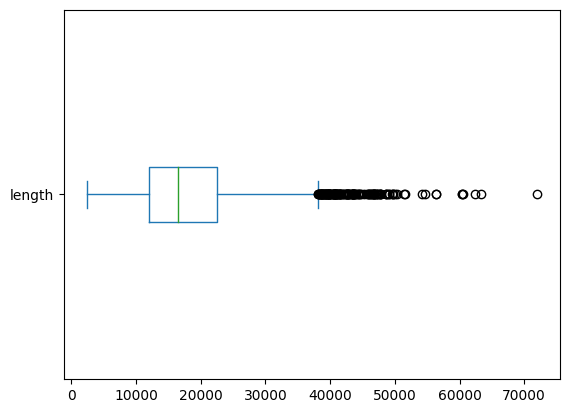

In [27]:
import matplotlib as mp
df['length'].plot(kind='box',vert=False)

<Axes: ylabel='Frequency'>

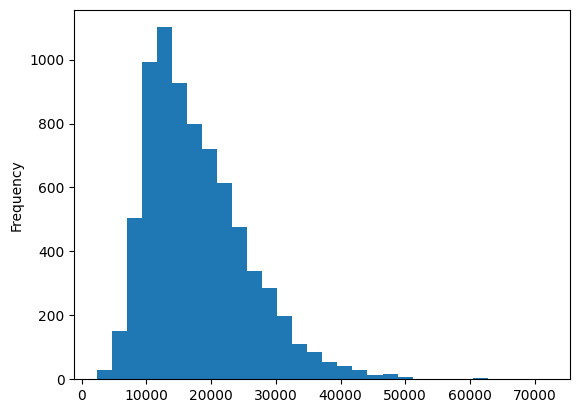

In [28]:
df['length'].plot(kind = 'hist' ,bins = 30)

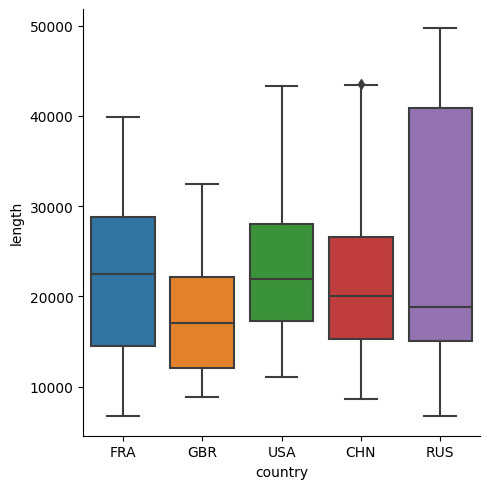

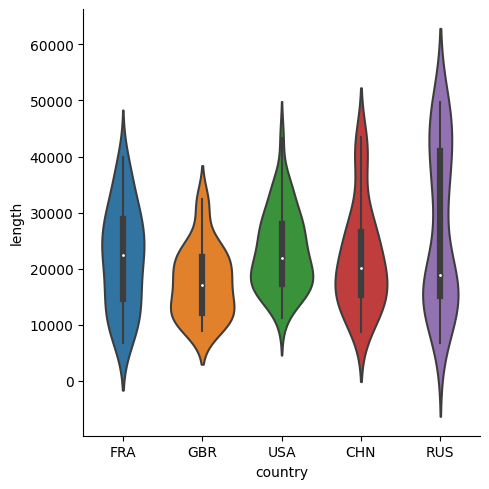

In [29]:
import seaborn as sns

where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data = df[where], x='country', y='length', kind='box')
sns.catplot(data = df[where], x='country', y='length', kind='violin')

<Axes: title={'center': 'Number of Countries'}, xlabel='year'>

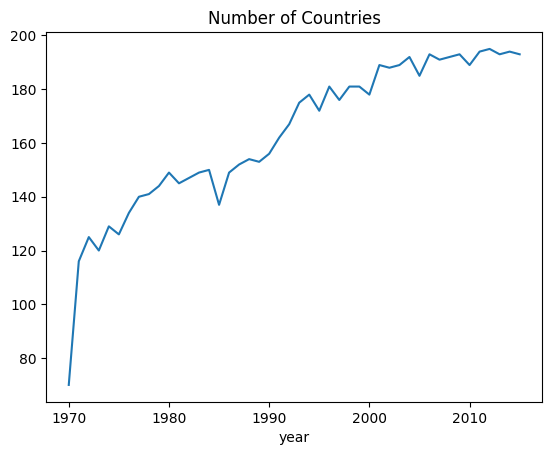

In [30]:
df.groupby('year').size().plot(title = "Number of Countries")

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

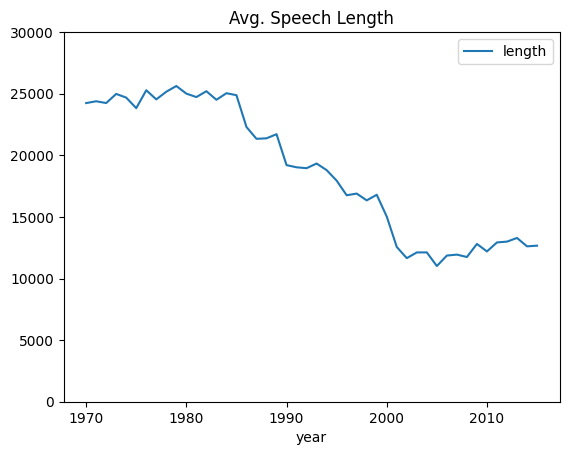

In [31]:
df.groupby('year').agg({'length':'mean'}).plot(title = "Avg. Speech Length", ylim=(0, 30000))

In [35]:
df['year'] = df['time'].dt.year

KeyError: 'time'

In [33]:
df['week'] = df['time'].dt.strftime('%Y/Week %W')

KeyError: 'time'

In [37]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*',text)

text = "Let's defeat SARS-CoV-2 together in 2020!"
tokens = tokenize(text)
print("|".join(tokens))


Let|s|defeat|SARS-CoV-2|together|in


In [45]:
import nltk
# nltk.download()
stopwords = set(nltk.corpus.stopwords.words('english'))


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [46]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [48]:
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords